In [296]:
#TO DO

#Redo for other movies (The Third Man, Spy who came in from the cold, etc)

#Generate output as json
#Generate Tek research paper
#Generate script in .doc format

In [297]:
# Resources
# http://varianceexplained.org/r/love-actually-network/
# http://academy.filminfocus.com/scripts/ttss_screenplay.pdf
# https://qz.com/650796/mathematicians-mapped-out-every-game-of-thrones-relationship-to-find-the-main-character/
# https://www.macalester.edu/~abeverid/thrones.html
# https://igraph.org/python/doc/tutorial/tutorial.html#treating-a-graph-as-an-adjacency-matrix
# https://www.digitaltonto.com/2013/how-the-nsa-uses-social-network-analysis-to-map-terrorist-networks/
# http://insna.org/PDF/Connections/v24/2001_I-3-7.pdf
# https://tm4ss.github.io/docs/index.html

In [298]:
# Load libraries

from pandas import DataFrame
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

import re

import plotnine                #used for ggplot
from plotnine import *

from scipy.cluster.hierarchy import dendrogram, linkage

#pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 100)

import warnings
warnings.filterwarnings('ignore')

In [299]:
f = open("/home/jdsen/Documents/PythonJupyter/TinkerTailorSoldierSpy.txt", "r")

In [300]:
# read the file content as one single string
f = f.read()

In [301]:
#Convert string into list (with carriage return as separator)
g=f.split('\n')

In [302]:
#Convert list to dataframe
df = DataFrame (g,columns=['Line'])

#df['Line'] = df['Line'].str.replace('\n','')

df.head(30)

,Line
0,﻿
1,
2,
3,TINKER TAILOR SOLDIER SPY
4,
5,
6,
7,Written by
8,
9,Bridget O'Connor & Peter Strau...


In [303]:
#Drop title rows at beginning
df = df.iloc[14:]

# resetting index 
#df.reset_index(inplace = True) 

df['ID'] = pd.RangeIndex(stop=df.shape[0])

#Add new columns 'Scene'
df['Scene'] = ''

#Create new column 'Speaker'
df['Speaker'] = ''

#Create new column 'Dialogue'
df['Dialogue'] = ''

#Create new column 'Description'
df['Description'] = ''

#Create new column 'Merge'
df['Merge'] = ''

In [304]:
#Strip unwanted stuff
df['Line'] = df['Line'].str.replace("(CONT'D)", '')
df['Line'] = df['Line'].str.replace("(V.O.)", '')
df['Line'] = df['Line'].str.replace("(O.S.)", '')
df['Line'] = df['Line'].str.replace(r'\(\)', '')

#replace parenthesis
df['Line'] = df['Line'].str.replace(r"\(",">")
df['Line'] = df['Line'].str.replace(r"\)",".")
 
df.head(25)

,Line,ID,Scene,Speaker,Dialogue,Description,Merge
14,1 EXT. HUNGARY - BUDAPEST - 1973 - DAY ...,0,,,,,
15,,1,,,,,
16,"Budapest skyline, looking towards the Parl...",2,,,,,
17,"From here the world looks serene, peaceful...",3,,,,,
18,"begin to PULL BACK, we hear a faint whine,...",4,,,,,
19,"volume, until it's the roar of two MiG jet...",5,,,,,
20,cutting across the skyline. The PULL BACK ...,6,,,,,
21,"BOY watching the jets, exclaiming excitedl...",7,,,,,
22,,8,,,,,
23,,9,,,,,


In [305]:
# Create 'Flag' 
result = [] 
for value in df["Line"]: 
    if re.search(r'^\d', value):           #Flag Scenes (starts with digits)
        result.append("Scene")         
    elif re.search('>', value):            #Flag Scenes (starts with    )
        result.append("Dial")       
    elif re.search(r'\d+\.$', value):      #Flag page numbers (end with number and fullstop)
        result.append("Num")      
    elif re.search(r'^[ ]{25,}', value):   #Flag Characters 
        result.append("Char")
    elif re.search(r'^[ ]{24,}', value):   #Flag Characters 
        result.append("Char")        
    elif re.search(r'^[ ]{20,}', value):   #Flag How
        result.append("Char")        
    elif re.search(r'^[ ]{15,}', value):   #Flag Dialogues
        result.append("Dial")          
    elif re.search(r'^[ ]{5,}', value):    #Flag Descriptions
        result.append("Desc")        
    elif value == '':                      #Flag blank lines
        result.append("Blank")
    else:                                  #Flag remaining lines as Descriptions
        result.append("Desc") 
    
df["Flag"] = result    

In [306]:
#Strip leading whitespace
df['Line'] = df['Line'].str.lstrip()

#Strip trailing whitespace
df['Line'] = df['Line'].str.strip()

In [307]:
#Drop Page Numbers
df = df[(df.Flag!='Num')]

In [308]:
#Loop through each row and update 'Scene' field
'''
for i in df.index:
    if df.at[i, "Flag"] == 'Scene':
        df.at[i, "Scene"] = df.at[i, "Line"] 
    else:
        df.at[i, "Scene"] = '' 
'''

'\nfor i in df.index:\n    if df.at[i, "Flag"] == \'Scene\':\n        df.at[i, "Scene"] = df.at[i, "Line"] \n    else:\n        df.at[i, "Scene"] = \'\' \n'

In [309]:
#Loop through each row and update 'Scene' field

scene = ''

for i in df.index:
    if df.at[i, "Flag"] == 'Scene':
        scene = df.at[i, "Line"]                     #Change scene
    else:
        scene = scene                                #Leave scene unchanged

    df.at[i, "Scene"] = scene

In [310]:
#Loop through each row and update the Speaker

speaker = ''

for i in df.index:
    if df.at[i, "Flag"] == 'Char':
        speaker = df.at[i, "Line"]          #Change speaker
     
    else:
        speaker = speaker                   #Leave speaker unchanged

        df.at[i, "Speaker"] = speaker    

In [311]:
#Remove rows where Flag = 'Char'
df = df[(df.Flag!='Char')]

In [312]:
#Remove rows where Flag = 'Blank'
df = df[(df.Flag!='Blank')]

In [313]:
#Remove Speaker where Flag = Desc
df.loc[df['Flag'] != 'Dial', 'Speaker'] = ''

In [314]:
#Create shorter SceneDesc
df['SceneShort'] = df['Scene'].str.slice(0,30)

In [315]:
#Drop old Scene
df = df.drop('Scene', 1)

In [316]:
#Parse 'Scene' into 2 fields
df['SceneNum'] = df['SceneShort'].str.split(' ').str[0]      #Extract text left of ' '
#df['SceneNum'] =  df.SceneShort.str.extract('(\d+)')
df['SceneDesc'] =  df.SceneShort.str.extract('(\D+)')

In [317]:
#Drop 'Scene' Column
df = df.drop('SceneShort', 1)

In [318]:
#Remove rows where Flag = 'Scene'
df = df[(df.Flag!='Scene')]

In [319]:
#Reorder columns    
df = df[['SceneNum','SceneDesc','Flag','Speaker','ID','Dialogue','Description','Line','Merge']]

In [320]:
#Create flag to group lines into one dialogue
df['ID_Diff'] = df['ID'].diff()

In [321]:
#Recode duplicates and shorten words

df['Speaker'] = df['Speaker'].str.replace('BILL HAYDON','HAYDON')
df['Speaker'] = df['Speaker'].str.replace('PERCY ALLELINE','ALLELINE')
df['Speaker'] = df['Speaker'].str.replace('PETER GUILLAM','GUILLAM')
df['Speaker'] = df['Speaker'].str.replace('JIM PRIDEAUX','PRIDEAUX')
df['Speaker'] = df['Speaker'].str.replace('OLIVER LACON','LACON')
df['Speaker'] = df['Speaker'].str.replace('ROY BLAND','BLAND')
df['Speaker'] = df['Speaker'].str.replace('BILL ROACH','ROACH')
df['Speaker'] = df['Speaker'].str.replace("PETER GUILLAM'S VOICE",'PETER GUILLAM')
df['Speaker'] = df['Speaker'].str.replace("TOBY ESTERHASE",'ESTERHASE')
df['Speaker'] = df['Speaker'].str.replace("GUILLAM'S VOICE",'GUILLAM')
df['Speaker'] = df['Speaker'].str.replace("TUFTY THESINGER",'THESINGER')
df['Speaker'] = df['Speaker'].str.replace("JERRY WESTERBY",'WESTERBY')
df['Speaker'] = df['Speaker'].str.replace("MRS POPE GRAHAM",'MRS GRAHAM')

#Remove letters from scene numbers
df['SceneNum'] = df['SceneNum'].str.replace("4A",'4.2')
df['SceneNum'] = df['SceneNum'].str.replace("4B",'4.3')
df['SceneNum'] = df['SceneNum'].str.replace("16A",'16.2')
df['SceneNum'] = df['SceneNum'].str.replace("30A",'30.2')
df['SceneNum'] = df['SceneNum'].str.replace("38A",'38.2')
df['SceneNum'] = df['SceneNum'].str.replace("38B",'38.3')
df['SceneNum'] = df['SceneNum'].str.replace("39A",'39.2')
df['SceneNum'] = df['SceneNum'].str.replace("40A",'40.2')
df['SceneNum'] = df['SceneNum'].str.replace("62A",'62.2')
df['SceneNum'] = df['SceneNum'].str.replace("63A",'63.2')
df['SceneNum'] = df['SceneNum'].str.replace("72A",'72.2')
df['SceneNum'] = df['SceneNum'].str.replace("90A",'90.2')
df['SceneNum'] = df['SceneNum'].str.replace("96A",'96.2')
df['SceneNum'] = df['SceneNum'].str.replace("103A",'103.2')
df['SceneNum'] = df['SceneNum'].str.replace("107A",'107.2')
df['SceneNum'] = df['SceneNum'].str.replace("129A",'129.2')
df['SceneNum'] = df['SceneNum'].str.replace("167A",'167.2')
df['SceneNum'] = df['SceneNum'].str.replace("178A",'178.2')
df['SceneNum'] = df['SceneNum'].str.replace("211A",'211.2')
df['SceneNum'] = df['SceneNum'].str.replace("211B",'211.3')
df['SceneNum'] = df['SceneNum'].str.replace("257A",'257.2')
df['SceneNum'] = df['SceneNum'].str.replace("257aA",'257.3')

#Recode scene number as numeric
df['SceneID'] = (df['SceneNum']).astype(float)

#Sort
df = df.sort_values(by=('SceneID'))

In [322]:
df.head(25)

,SceneNum,SceneDesc,Flag,Speaker,ID,Dialogue,Description,Line,Merge,ID_Diff,SceneID
16,1,EXT. HUNGARY - BUDAPEST -,Desc,,2,,,"Budapest skyline, looking towards the Parliame...",,NaN,1.0
17,1,EXT. HUNGARY - BUDAPEST -,Desc,,3,,,"From here the world looks serene, peaceful. Th...",,1.0,1.0
18,1,EXT. HUNGARY - BUDAPEST -,Desc,,4,,,"begin to PULL BACK, we hear a faint whine, inc...",,1.0,1.0
19,1,EXT. HUNGARY - BUDAPEST -,Desc,,5,,,"volume, until it's the roar of two MiG jet fig...",,1.0,1.0
20,1,EXT. HUNGARY - BUDAPEST -,Desc,,6,,,cutting across the skyline. The PULL BACK reve...,,1.0,1.0
21,1,EXT. HUNGARY - BUDAPEST -,Desc,,7,,,"BOY watching the jets, exclaiming excitedly in...",,1.0,1.0
48,2,EXT. BUDAPEST STREET - DAY,Desc,,34,,,contact between the two. Then both men walk on...,,1.0,2.0
47,2,EXT. BUDAPEST STREET - DAY,Desc,,33,,,and gives the smallest of rueful smiles. A tin...,,1.0,2.0
46,2,EXT. BUDAPEST STREET - DAY,Desc,,32,,,sees Prideaux has caught the moment of slight ...,,1.0,2.0
45,2,EXT. BUDAPEST STREET - DAY,Desc,,31,,,"road, collides with another passerby. He looks...",,1.0,2.0


In [323]:
# Display number of lines by Speaker
grouped = df.groupby(['Speaker'])["Line"].count().reset_index()
grouped

,Speaker,Line
0,,2289
1,ALLELINE,49
2,BELINDA,1
3,BEN,9
4,BLAND,35
5,BRYANT,1
6,CLASS,2
7,CONNIE SACHS,64
8,CONTROL,40
9,ESTERHASE,43


In [324]:
#create crosstab (could have used pivot as well)
data = pd.crosstab(df.Speaker, df.SceneID)

#drop empty Speakers
data = data.drop(data.index[0])

In [325]:
data = data.T

data.head(25)

Speaker,ALLELINE,BELINDA,BEN,BLAND,BRYANT,CLASS,CONNIE SACHS,CONTROL,ESTERHASE,GUILLAM,...,PRIDEAUX,RICHARD,RICKI TARR,ROACH,SAL,SCALPHUNTER,SMILEY,THESINGER,WESTERBY,WOMAN'S VOICE
SceneID,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,3,0,0,0,0,0,0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
#Build co-occurence dataframe matrix (why does it multiply rather than add ?)
df_asint = data.astype(int)
coocc = df_asint.T.dot(df_asint)
coocc.head(10)

Speaker,ALLELINE,BELINDA,BEN,BLAND,BRYANT,CLASS,CONNIE SACHS,CONTROL,ESTERHASE,GUILLAM,...,PRIDEAUX,RICHARD,RICKI TARR,ROACH,SAL,SCALPHUNTER,SMILEY,THESINGER,WESTERBY,WOMAN'S VOICE
Speaker,,,,,,,,,,,,,,,,,,,,,
ALLELINE,461,0,0,8,0,0,35,57,16,91,...,0,0,0,0,0,0,28,0,0,0
BELINDA,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
BEN,0,0,19,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,0
BLAND,8,0,0,693,0,0,0,0,0,182,...,0,0,0,0,0,0,0,0,0,0
BRYANT,0,0,0,0,1,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
CLASS,0,0,0,0,0,4,0,0,0,0,...,26,0,0,10,0,0,0,0,0,0
CONNIE SACHS,35,0,0,0,0,0,1300,0,0,0,...,0,0,0,0,0,0,422,0,0,0
CONTROL,57,0,0,0,0,0,0,340,29,0,...,0,0,0,0,0,0,90,0,0,0
ESTERHASE,16,0,0,0,0,0,0,29,349,30,...,0,0,0,0,0,0,267,0,0,0


In [327]:
#Give each Speaker a unique id
df2 = pd.DataFrame(coocc.index) 
df2['index1'] = df2.index
df2 = df2.set_index('Speaker')

In [328]:
#Create list of Speakers
guys=df2.index.tolist()

In [329]:
#Compute all possible combinations of characters and lookup their relative weight

import itertools

List1 = []
List2 = []
ID1 = []
ID2 = []
weight = []

All_combinations = itertools.combinations(guys, 2)              #calculate all combinations of pairs


for comb in All_combinations:              
    List1.append(comb[0])                                     #Append left guy
    List2.append(comb[1])                                     #Append right guy
    ID1.append(df2.at[comb[0],'index1'])                      #Append left guy ID
    ID2.append(df2.at[comb[1],'index1'])                      #Append right guy ID    
    weight.append(coocc.at[comb[0],comb[1]])                  #lookup weight in coocc table and append

data2 = {'Person2': List1,
        'Person1': List2,
        'ID1':ID1,
        'ID2':ID2,
        'Weight': weight
       }

dfx = pd.DataFrame.from_dict(data2)


In [330]:
dfx.head(25)

,Person2,Person1,ID1,ID2,Weight
0,ALLELINE,BELINDA,0,1,0
1,ALLELINE,BEN,0,2,0
2,ALLELINE,BLAND,0,3,8
3,ALLELINE,BRYANT,0,4,0
4,ALLELINE,CLASS,0,5,0
5,ALLELINE,CONNIE SACHS,0,6,35
6,ALLELINE,CONTROL,0,7,57
7,ALLELINE,ESTERHASE,0,8,16
8,ALLELINE,GUILLAM,0,9,91
9,ALLELINE,HAYDON,0,10,0


In [331]:
#Create a list of edges from the intensity dataframe
dfx['edges'] = dfx.apply(lambda x: (x.ID1,x.ID2), axis=1)

#Remove rows where weight = 0
dfx = dfx[(dfx.Weight!=0)]
dfx.head(20)

,Person2,Person1,ID1,ID2,Weight,edges
2,ALLELINE,BLAND,0,3,8,"(0, 3)"
5,ALLELINE,CONNIE SACHS,0,6,35,"(0, 6)"
6,ALLELINE,CONTROL,0,7,57,"(0, 7)"
7,ALLELINE,ESTERHASE,0,8,16,"(0, 8)"
8,ALLELINE,GUILLAM,0,9,91,"(0, 9)"
14,ALLELINE,LACON,0,15,42,"(0, 15)"
20,ALLELINE,MINISTER,0,21,70,"(0, 21)"
21,ALLELINE,MOTHER,0,22,6,"(0, 22)"
33,ALLELINE,SMILEY,0,34,28,"(0, 34)"
48,BELINDA,KASPAR,1,13,1,"(1, 13)"


In [332]:
#Create a list of edges
edges = dfx["edges"].tolist()

#Create a list of weights
foo = dfx["Weight"].tolist()


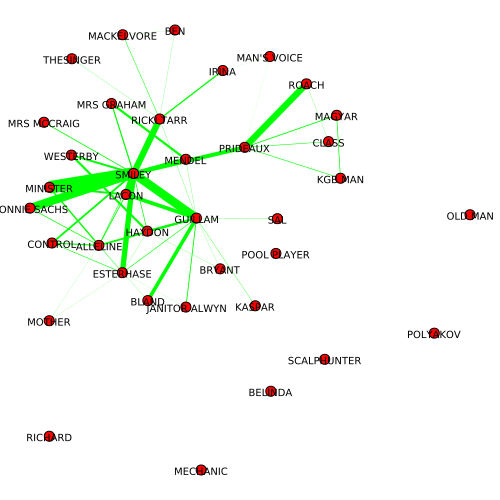

In [333]:
import igraph
from igraph import *

# Define graph (in memory)
g = Graph(edges)

# Define Edge width
g.es["width"] = foo
width = [(0.02) * (width) for width in g.es["width"]]
#width = g.es["width"]


#Labels
g.vs["label"] = guys

layout = g.layout("kk")

#Visual style
visual_style = {}
visual_style["vertex_size"] = 10
color_dict = {"m": "white", "f": "pink"}
visual_style["edge_width"] = width
visual_style["vertex_label"] = g.vs["label"]
visual_style["layout"] = layout
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 30
visual_style["vertex_label_size"] = 10
visual_style["edge_color"] = "green"

#Plot graph
plot(g, **visual_style)

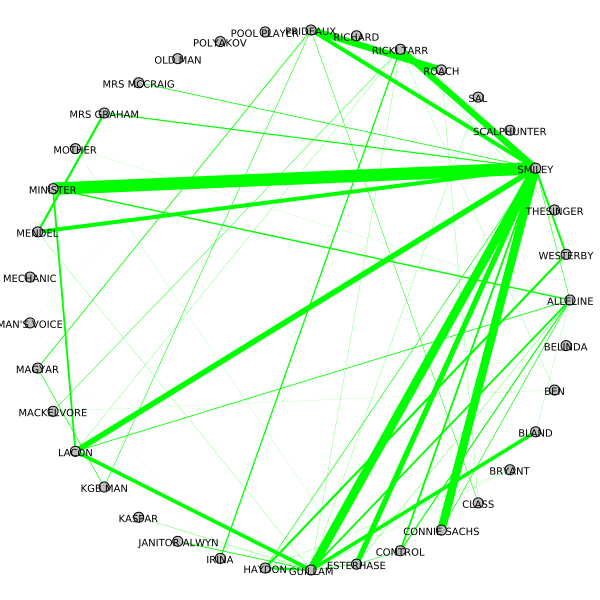

In [334]:
import igraph
from igraph import *

# Define graph (in memory)
g = Graph(edges)

# Define Edge width
g.es["width"] = foo
width = [(0.02) * (width) for width in g.es["width"]]
#width = g.es["width"]

#Labels
g.vs["label"] = guys

layout = g.layout("circle")

#Visual style
visual_style = {}
visual_style["vertex_size"] = 10
color_dict = {"m": "white", "f": "pink"}
visual_style["edge_width"] = width
visual_style["vertex_label"] = g.vs["label"]
visual_style["vertex_color"] = "grey"
visual_style["layout"] = layout
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 30
visual_style["vertex_label_size"] = 10
visual_style["edge_color"] = "green"

#Plot graph
plot(g, **visual_style)

In [335]:
#Print name of person with maximum connections
g.vs.select(_degree = g.maxdegree())["label"]

['GUILLAM', 'SMILEY']

In [336]:
#Group Speakers by Scene
goo = df.groupby(['SceneID','SceneDesc','Speaker'])["Line"].count().reset_index()

#Remove rows with no Speaker
goo = goo[(goo.Speaker!='')]

goo.head(20)

,SceneID,SceneDesc,Speaker,Line
4,4.0,INT. BUDAPEST - GALERIA -,KGB MAN,5
5,4.0,INT. BUDAPEST - GALERIA -,MAGYAR,7
6,4.0,INT. BUDAPEST - GALERIA -,PRIDEAUX,6
10,5.0,INT. CIRCUS - CONFERENCE,ALLELINE,3
11,5.0,INT. CIRCUS - CONFERENCE,CONTROL,5
12,5.0,INT. CIRCUS - CONFERENCE,ESTERHASE,1
14,7.0,INT. CIRCUS - FIFTH FLOOR,HAYDON,1
38,29.0,INT. SAFE H - MEETING ROO,POLYAKOV,2
41,30.2,A INT./EXT. LACON'S H - MO,LACON,4
42,30.2,A INT./EXT. LACON'S H - MO,RICKI TARR,3


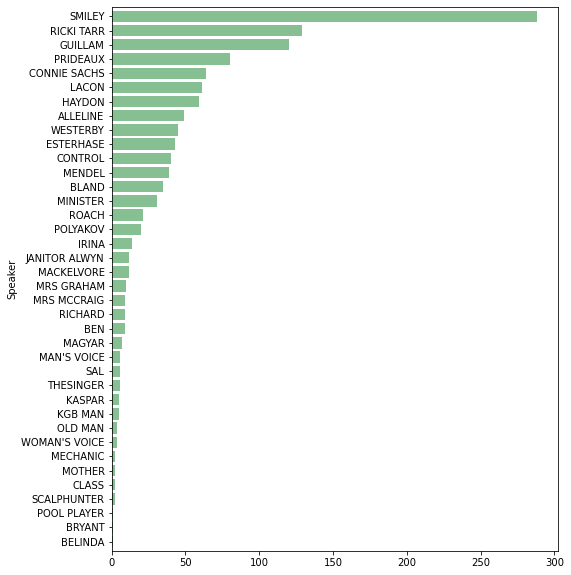

In [337]:
#Lines per speaker (with Pandas Matplotlib)
x = goo.groupby('Speaker')['Line'].sum().sort_values()
x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.8)

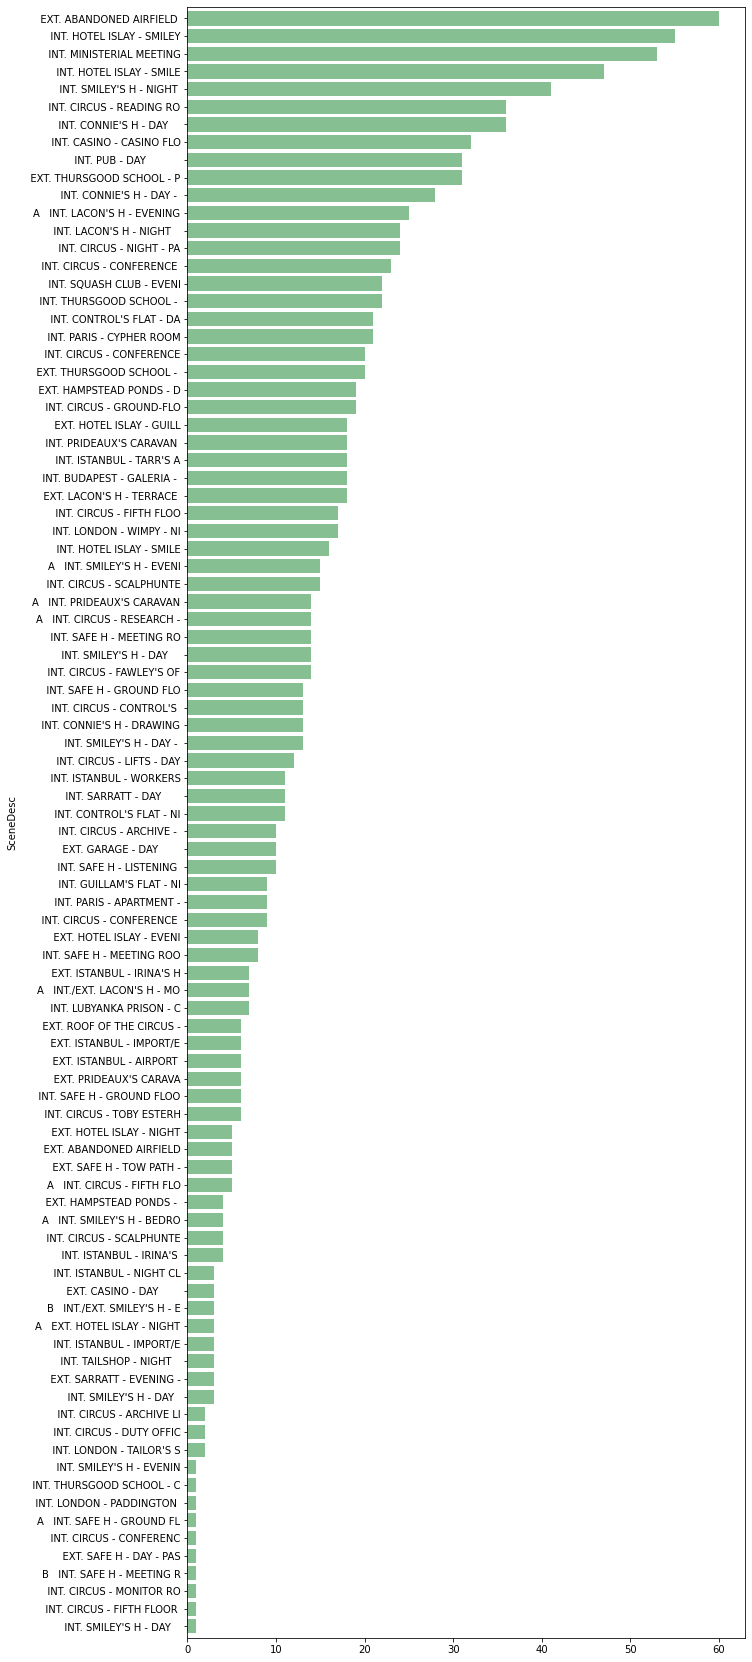

In [338]:
#Lines per Scene (with Pandas Matplotlib)
x = goo.groupby('SceneDesc')['Line'].sum().sort_values()
x.plot(kind='barh', figsize=(10, 30), color='#86bf91', zorder=2, width=0.8)

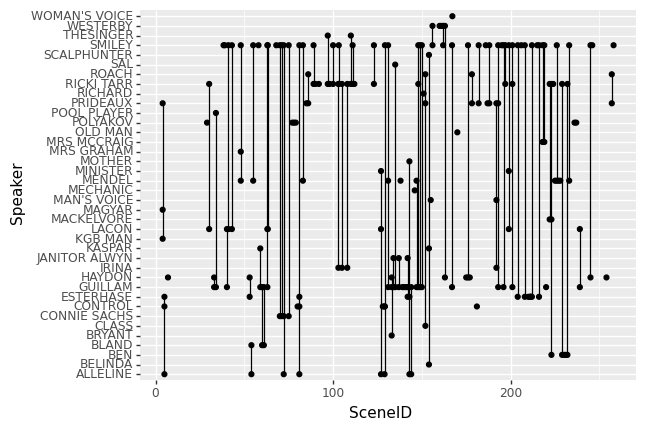

<ggplot: (8754236925624)>

In [339]:
#Plot character interactions over time
plot2 = ggplot(goo, aes(x='SceneID', y='Speaker')) + geom_point() + geom_path(aes(group = 'SceneID'))
plot2.save("Plot2.png", width=25, height=25)
plot2

In [340]:
data.T

SceneID,1.0,2.0,3.0,4.0,4.2,4.3,5.0,7.0,8.0,9.0,...,247.0,248.0,249.0,254.0,255.0,256.0,257.0,257.2,257.3,258.0
Speaker,,,,,,,,,,,,,,,,,,,,,
ALLELINE,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BELINDA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BLAND,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BRYANT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CLASS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONNIE SACHS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CONTROL,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ESTERHASE,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


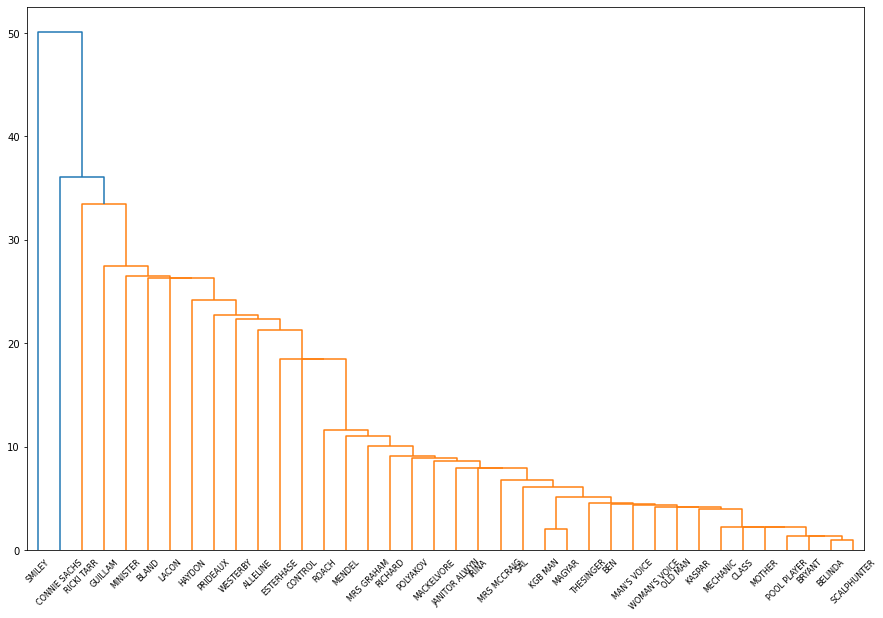

In [341]:
#Dendogram (with matplotlib)
linked = linkage(data.T, 'single')
plt.figure(figsize=(15, 10))
dendrogram(linked,
            orientation='top',
            labels=guys,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [342]:
# Descriptions and dialogues by Scene and Speaker
story = df.groupby(['ID','SceneID','SceneDesc',"Speaker",'ID_Diff','Line'])["Flag"].count().reset_index().head(100)

In [343]:
#Generate a novel (text file) from the movie script
